In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [21]:
### Defining States of the Graph:
class CricketState(TypedDict):
    runs:int
    balls:int
    Fours:int
    Sixes:int
    SR:float
    runs_in_boundaries_percentage:float
    Balls_per_boundary:float
    summary:str

In [34]:
def sr_calculation(state:CricketState) ->CricketState:
    runs=state['runs']
    balls=state['balls']
    state['SR'] = (runs/balls)*100
    return {'SR':state['SR']}

In [35]:
def runs_in_boundary_analysis(state:CricketState) ->CricketState:
    runs=state['runs']
    fours=state['Fours']
    sixes=state['Sixes']
    runs_in_boundaries = (fours * 4) + (sixes * 6)
    state['runs_in_boundaries_percentage'] = (runs_in_boundaries / runs) * 100 if runs > 0 else 0
    return {'runs_in_boundaries_percentage':state['runs_in_boundaries_percentage']}

In [36]:
def balls_per_boundary_analysis(state:CricketState) ->CricketState:
    balls=state['balls']
    fours=state['Fours']
    sixes=state['Sixes']
    total_boundaries = fours + sixes
    state['Balls_per_boundary'] = (balls / total_boundaries) if total_boundaries > 0 else 0
    return {'Balls_per_boundary':state['Balls_per_boundary']}

In [37]:
def summary_generation(state:CricketState) ->CricketState:
    runs=state['runs']
    balls=state['balls']
    fours=state['Fours']
    sixes=state['Sixes']
    sr=state['SR']
    runs_in_boundaries_percentage=state['runs_in_boundaries_percentage']
    balls_per_boundary=state['Balls_per_boundary']
    
    summary= (f"Scored {runs} runs off {balls} balls with a strike rate of {sr:.2f}. "
                        f"Hit {fours} fours and {sixes} sixes. "
                        f"{runs_in_boundaries_percentage:.2f}% of runs came from boundaries, "
                        f"averaging {balls_per_boundary:.2f} balls per boundary.")

    state['summary']=summary

    return {'summary':summary}

In [38]:
### Defining the graph, nodes and edges:
graph=StateGraph(state_schema=CricketState)

graph.add_node(name="sr_calculation",node=sr_calculation)
graph.add_node(name="runs_in_boundary_analysis",node=runs_in_boundary_analysis)
graph.add_node(name="balls_per_boundary_analysis",node=balls_per_boundary_analysis)
graph.add_node(name="summary_generation",node=summary_generation)

graph.add_edge(START,"sr_calculation")
graph.add_edge(START,"runs_in_boundary_analysis")
graph.add_edge(START,"balls_per_boundary_analysis")
graph.add_edge("sr_calculation","summary_generation")
graph.add_edge("runs_in_boundary_analysis","summary_generation")
graph.add_edge("balls_per_boundary_analysis","summary_generation")
graph.add_edge("summary_generation",END)

### Compiling the graph:
workflow=graph.compile()

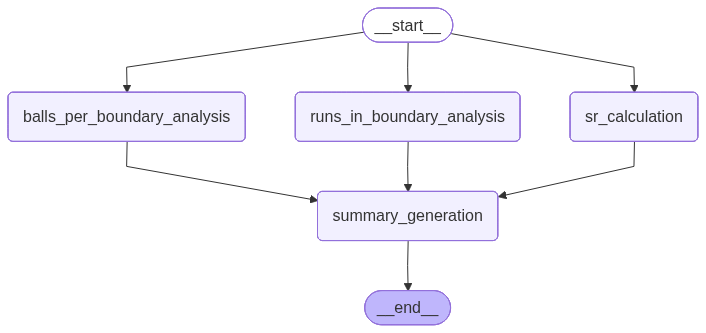

In [39]:
### Visualization
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [43]:
initial_state={
    'runs':150,
    'balls':120,
    'Fours':15,
    'Sixes':5,
    'SR':0.0,
    'runs_in_boundaries_percentage':0.0,
    'Balls_per_boundary':0.0,
    'summary':""
}

final_state=workflow.invoke(initial_state)
print(f'{final_state}')

{'runs': 150, 'balls': 120, 'Fours': 15, 'Sixes': 5, 'SR': 125.0, 'runs_in_boundaries_percentage': 60.0, 'Balls_per_boundary': 6.0, 'summary': 'Scored 150 runs off 120 balls with a strike rate of 125.00. Hit 15 fours and 5 sixes. 60.00% of runs came from boundaries, averaging 6.00 balls per boundary.'}
